This Jupyter Notebook include some basic data analysis and visualizations of WHO data on COVID-19 which caused a global pandemic in 2020

contact: 🐦twitter@smirshekari

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
import matplotlib.ticker as mtick
from random import sample 
import datetime
from labellines import *

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import Data

In [2]:
# data Downloaded from: https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases on 03/22/2020
#corona_confirmed = https://data.humdata.org/hxlproxy/data/download/time_series_covid19_confirmed_global_narrow.csv?dest=data_edit&filter01=merge&merge-url01=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D1326629740%26single%3Dtrue%26output%3Dcsv&merge-keys01=%23country%2Bname&merge-tags01=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&filter02=merge&merge-url02=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D398158223%26single%3Dtrue%26output%3Dcsv&merge-keys02=%23adm1%2Bname&merge-tags02=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&merge-replace02=on&merge-overwrite02=on&filter03=explode&explode-header-att03=date&explode-value-att03=value&filter04=rename&rename-oldtag04=%23affected%2Bdate&rename-newtag04=%23date&rename-header04=Date&filter05=rename&rename-oldtag05=%23affected%2Bvalue&rename-newtag05=%23affected%2Binfected%2Bvalue%2Bnum&rename-header05=Value&filter06=clean&clean-date-tags06=%23date&filter07=sort&sort-tags07=%23date&sort-reverse07=on&filter08=sort&sort-tags08=%23country%2Bname%2C%23adm1%2Bname&tagger-match-all=on&tagger-default-tag=%23affected%2Blabel&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv
#corona_deaths    = https://data.humdata.org/hxlproxy/data/download/time_series_covid19_deaths_global_narrow.csv?dest=data_edit&filter01=merge&merge-url01=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D1326629740%26single%3Dtrue%26output%3Dcsv&merge-keys01=%23country%2Bname&merge-tags01=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&filter02=merge&merge-url02=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D398158223%26single%3Dtrue%26output%3Dcsv&merge-keys02=%23adm1%2Bname&merge-tags02=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&merge-replace02=on&merge-overwrite02=on&filter03=explode&explode-header-att03=date&explode-value-att03=value&filter04=rename&rename-oldtag04=%23affected%2Bdate&rename-newtag04=%23date&rename-header04=Date&filter05=rename&rename-oldtag05=%23affected%2Bvalue&rename-newtag05=%23affected%2Binfected%2Bvalue%2Bnum&rename-header05=Value&filter06=clean&clean-date-tags06=%23date&filter07=sort&sort-tags07=%23date&sort-reverse07=on&filter08=sort&sort-tags08=%23country%2Bname%2C%23adm1%2Bname&tagger-match-all=on&tagger-default-tag=%23affected%2Blabel&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv
#corona_recovered = https://data.humdata.org/hxlproxy/data/download/time_series_covid19_recovered_global_narrow.csv?dest=data_edit&filter01=merge&merge-url01=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D1326629740%26single%3Dtrue%26output%3Dcsv&merge-keys01=%23country%2Bname&merge-tags01=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&filter02=merge&merge-url02=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D398158223%26single%3Dtrue%26output%3Dcsv&merge-keys02=%23adm1%2Bname&merge-tags02=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&merge-replace02=on&merge-overwrite02=on&filter03=explode&explode-header-att03=date&explode-value-att03=value&filter04=rename&rename-oldtag04=%23affected%2Bdate&rename-newtag04=%23date&rename-header04=Date&filter05=rename&rename-oldtag05=%23affected%2Bvalue&rename-newtag05=%23affected%2Binfected%2Bvalue%2Bnum&rename-header05=Value&filter06=clean&clean-date-tags06=%23date&filter07=sort&sort-tags07=%23date&sort-reverse07=on&filter08=sort&sort-tags08=%23country%2Bname%2C%23adm1%2Bname&tagger-match-all=on&tagger-default-tag=%23affected%2Blabel&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv

# corona_confirmed = pd.read_csv('/home/smirs/Downloads/time_series_covid19_confirmed_global_narrow.csv', skiprows=[1])
# corona_deaths    = pd.read_csv('/home/smirs/Downloads/time_series_covid19_deaths_global_narrow.csv', skiprows=[1])
# corona_recovered = pd.read_csv('/home/smirs/Downloads/time_series_covid19_recovered_global_narrow.csv', skiprows=[1])

import urllib.request

link_confirmed = 'https://data.humdata.org/hxlproxy/data/download/time_series_covid19_confirmed_global_narrow.csv?dest=data_edit&filter01=merge&merge-url01=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D1326629740%26single%3Dtrue%26output%3Dcsv&merge-keys01=%23country%2Bname&merge-tags01=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&filter02=merge&merge-url02=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D398158223%26single%3Dtrue%26output%3Dcsv&merge-keys02=%23adm1%2Bname&merge-tags02=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&merge-replace02=on&merge-overwrite02=on&filter03=explode&explode-header-att03=date&explode-value-att03=value&filter04=rename&rename-oldtag04=%23affected%2Bdate&rename-newtag04=%23date&rename-header04=Date&filter05=rename&rename-oldtag05=%23affected%2Bvalue&rename-newtag05=%23affected%2Binfected%2Bvalue%2Bnum&rename-header05=Value&filter06=clean&clean-date-tags06=%23date&filter07=sort&sort-tags07=%23date&sort-reverse07=on&filter08=sort&sort-tags08=%23country%2Bname%2C%23adm1%2Bname&tagger-match-all=on&tagger-default-tag=%23affected%2Blabel&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv'
link_dead = 'https://data.humdata.org/hxlproxy/data/download/time_series_covid19_deaths_global_narrow.csv?dest=data_edit&filter01=merge&merge-url01=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D1326629740%26single%3Dtrue%26output%3Dcsv&merge-keys01=%23country%2Bname&merge-tags01=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&filter02=merge&merge-url02=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D398158223%26single%3Dtrue%26output%3Dcsv&merge-keys02=%23adm1%2Bname&merge-tags02=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&merge-replace02=on&merge-overwrite02=on&filter03=explode&explode-header-att03=date&explode-value-att03=value&filter04=rename&rename-oldtag04=%23affected%2Bdate&rename-newtag04=%23date&rename-header04=Date&filter05=rename&rename-oldtag05=%23affected%2Bvalue&rename-newtag05=%23affected%2Binfected%2Bvalue%2Bnum&rename-header05=Value&filter06=clean&clean-date-tags06=%23date&filter07=sort&sort-tags07=%23date&sort-reverse07=on&filter08=sort&sort-tags08=%23country%2Bname%2C%23adm1%2Bname&tagger-match-all=on&tagger-default-tag=%23affected%2Blabel&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv'
link_recovered = 'https://data.humdata.org/hxlproxy/data/download/time_series_covid19_recovered_global_narrow.csv?dest=data_edit&filter01=merge&merge-url01=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D1326629740%26single%3Dtrue%26output%3Dcsv&merge-keys01=%23country%2Bname&merge-tags01=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&filter02=merge&merge-url02=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D398158223%26single%3Dtrue%26output%3Dcsv&merge-keys02=%23adm1%2Bname&merge-tags02=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&merge-replace02=on&merge-overwrite02=on&filter03=explode&explode-header-att03=date&explode-value-att03=value&filter04=rename&rename-oldtag04=%23affected%2Bdate&rename-newtag04=%23date&rename-header04=Date&filter05=rename&rename-oldtag05=%23affected%2Bvalue&rename-newtag05=%23affected%2Binfected%2Bvalue%2Bnum&rename-header05=Value&filter06=clean&clean-date-tags06=%23date&filter07=sort&sort-tags07=%23date&sort-reverse07=on&filter08=sort&sort-tags08=%23country%2Bname%2C%23adm1%2Bname&tagger-match-all=on&tagger-default-tag=%23affected%2Blabel&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv'
# f_confirmed = urllib.request.urlopen(link_confirmed)
# f_dead = urllib.request.urlopen(link_dead)
# f_recovered = urllib.request.urlopen(link_recovered)

corona_confirmed = pd.read_csv(link_confirmed, skiprows=[1])
corona_deaths = pd.read_csv(link_dead, skiprows=[1])
corona_recovered = pd.read_csv(link_recovered, skiprows=[1])

In [6]:
corona_deaths.head(3)

,Province/State,Country/Region,Lat,Long,Date,Value,ISO 3166-1 Alpha 3-Codes,Region Code,Sub-region Code,Intermediate Region Code
0,NaN,Afghanistan,33.0,65.0,2020-04-11,18,AFG,142.0,34.0,NaN
1,NaN,Afghanistan,33.0,65.0,2020-04-10,15,AFG,142.0,34.0,NaN
2,NaN,Afghanistan,33.0,65.0,2020-04-09,15,AFG,142.0,34.0,NaN


In [7]:
corona_deaths['Country/Region'].loc[corona_deaths['Province/State'].notnull()].unique()

array(['Australia', 'Canada', 'China', 'Denmark', 'France', 'Netherlands',
       'United Kingdom'], dtype=object)

In [8]:
last_date = max(corona_confirmed['Date'])

# Deta Cleaning/Reshaping

In [9]:
# Tag datasets before combining them to one
corona_confirmed['Key'] = '#confirmed'
corona_deaths['Key'] = '#dead'
corona_recovered['Key'] = '#recovered'

In [10]:
# make a target list of countries for plotting
country_list = ['China', 'Italy', 'Korea, South', 'Germany', 'US', 'Spain', 'France', 'Switzerland', 'Iran', 'United Kingdom', 'Netherlands', 'Japan',
                'Canada', 'Australia', 'India', 'Russia']
#country_list = ['Australia']
population_dic = {'Italy':60317546, 'Korea, South':51709098, 'Germany':83149300, 'US':328239523, 'Spain':46733038, 'France':67022000,
                  'Switzerland':8570146, 'China':1427647786, 'Iran':83183741, 'United Kingdom':67545757, 'Netherlands':17424978, 'Japan':126150000,
                  'Canada':37894799, 'Australia':25656100, 'India':1376863120, 'Russia':145934462} 

# Concatinating data
data_frames = pd.concat([corona_confirmed, corona_deaths, corona_recovered])

#data_frames = pd.concat([corona_confirmed, corona_deaths])

# Limit data from the countries from the target country list
data_frames = data_frames.loc[data_frames['Country/Region'].isin(country_list)]

#data_frames['Country/Region'] = data_frames['Country/Region'] + ', ' + data_frames['Province/State']
len_con = len(data_frames['Country/Region'].unique())

# Reshaping data
data_frames = data_frames.loc[:,['Country/Region', 'Date', 'Value', 'Key']]

# converting the column 'Date' to datetime64 type
data_frames['Date'] = data_frames['Date'].astype('datetime64[ns]') 

# Reshaping data by grouping by country within a date for each key and reindexing
data_frames = data_frames.groupby(['Country/Region', 'Date', 'Key']).sum().reset_index()

In [11]:
# pivoting data
data_frames = pd.pivot_table(data_frames, values='Value', index=['Country/Region', 'Date'], columns=['Key'], aggfunc=np.sum).reset_index() 

In [12]:
# take a look at our cleaned & reshaped dataset
data_frames['Country/Region'].unique()

array(['Australia', 'Canada', 'China', 'France', 'Germany', 'India',
       'Iran', 'Italy', 'Japan', 'Korea, South', 'Netherlands', 'Russia',
       'Spain', 'Switzerland', 'US', 'United Kingdom'], dtype=object)

# Creating New Insightful Features

In [13]:
def get_yesterday_confirmed(today, mycountry):
    '''
    This functions takes today date and a country as inputs and returns the value of confirmed-cases from a day before
    '''
    DD = datetime.timedelta(days=1)
    yesterday = today - DD
    yesterday_str = yesterday.strftime("%Y-%m-%d")
    
    try:
        res = data_frames.loc[(data_frames['Country/Region'] == mycountry) & (data_frames['Date']==yesterday_str)]['#confirmed'].reset_index()['#confirmed'][0]
    except:
        res = 0
    return res

In [14]:
def get_yesterday_dead(today, mycountry):
    '''
    This functions takes today date and a country as inputs and returns the value of dead-cases from a day before
    '''
    DD = datetime.timedelta(days=1)
    yesterday = today - DD
    yesterday_str = yesterday.strftime("%Y-%m-%d")
    
    try:
        res = data_frames.loc[(data_frames['Country/Region'] == mycountry) & (data_frames['Date']==yesterday_str)]['#dead'].reset_index()['#dead'][0]
    except:
        res = 0
    return res

In [15]:
def get_yesterday_recovered(today, mycountry):
    '''
    This functions takes today date and a country as inouts and returns the value of recovered-cases from the day before
    '''
    DD = datetime.timedelta(days=1)
    yesterday = today - DD
    yesterday_str = yesterday.strftime("%Y-%m-%d")
    
    try:
        res = data_frames.loc[(data_frames['Country/Region'] == mycountry) & (data_frames['Date']==yesterday_str)]['#recovered'].reset_index()['#recovered'][0]
    except:
        res = 0
    return res

In [16]:
def get_population(country):
    '''
    returns the population of the given country
    '''
    return population_dic[country]

In [17]:
# Adding new columns to include yesterday values
data_frames['#yesterday_confirmed'] = data_frames.apply(lambda x: get_yesterday_confirmed(x['Date'], x['Country/Region']), axis=1)
data_frames['#yesterday_dead'] = data_frames.apply(lambda x: get_yesterday_dead(x['Date'], x['Country/Region']), axis=1)
data_frames['#yesterday_recovered'] = data_frames.apply(lambda x: get_yesterday_recovered(x['Date'], x['Country/Region']), axis=1)

# Adding new columns to include daily new values
data_frames['#new_confirmed'] = data_frames['#confirmed'] - data_frames['#yesterday_confirmed']
data_frames['#new_dead'] = data_frames['#dead'] - data_frames['#yesterday_dead']
data_frames['#new_recovered'] = data_frames['#recovered'] - data_frames['#yesterday_recovered']

In [18]:
data_frames.tail(10)

Key,Country/Region,Date,#confirmed,#dead,#recovered,#yesterday_confirmed,#yesterday_dead,#yesterday_recovered,#new_confirmed,#new_dead,#new_recovered
1286,United Kingdom,2020-04-02,34173,2926,192,29865,2357,179,4308,569,13
1287,United Kingdom,2020-04-03,38689,3611,208,34173,2926,192,4516,685,16
1288,United Kingdom,2020-04-04,42477,4320,215,38689,3611,208,3788,709,7
1289,United Kingdom,2020-04-05,48436,4943,229,42477,4320,215,5959,623,14
1290,United Kingdom,2020-04-06,52279,5385,287,48436,4943,229,3843,442,58
1291,United Kingdom,2020-04-07,55949,6171,325,52279,5385,287,3670,786,38
1292,United Kingdom,2020-04-08,61474,7111,345,55949,6171,325,5525,940,20
1293,United Kingdom,2020-04-09,65872,7993,359,61474,7111,345,4398,882,14
1294,United Kingdom,2020-04-10,74605,8974,588,65872,7993,359,8733,981,229
1295,United Kingdom,2020-04-11,79874,9892,622,74605,8974,588,5269,918,34


In [19]:
# Adding new columns to include other insightful values
data_frames['dead_by_confirmed'] = data_frames['#dead']/data_frames['#confirmed']*100
data_frames['recovered_by_confirmed'] = data_frames['#recovered']/data_frames['#confirmed']*100
data_frames['confirmed_minus_recovered&dead'] = data_frames['#confirmed'] - data_frames['#recovered'] - data_frames['#dead']
data_frames['population'] = data_frames.apply(lambda x: get_population(x['Country/Region']), axis=1)
data_frames['confirmed_minus_recovered&dead_per_capita'] = data_frames['confirmed_minus_recovered&dead']/data_frames['population']
data_frames['confirmed_per_capita'] = data_frames['#confirmed']/data_frames['population']
data_frames['dead_per_capita'] = data_frames['#dead']/data_frames['population']

# data_frames['new_confirmed_per_capita'] = data_frames['#new_confirmed']/data_frames['population']


In [20]:
df = pd.DataFrame(columns=data_frames.columns)
country_list_mod = data_frames['Country/Region'].unique()
for country in country_list_mod:
    sub_df = data_frames.loc[(data_frames['Country/Region']==country) & (data_frames['#confirmed']>= 100)].reset_index(drop=True)
    #sub_df['Key'] = sub_df.index
    #display(sub_df)
    df = df.append(sub_df, sort=True)
    
df['days_after_threshold'] = df.index    
data_frames_indexed = df
threshold_str = 'Days After 100th Confirmed-Case'

In [50]:
labels_dic = {'days_after_threshold': threshold_str, 'Date':'Date',
              '#confirmed':'Confirmed Cases [Cumulative]',
              '#dead':'Death Cases [Cummulative]',
              'confirmed_minus_recovered&dead': 'Currently Under-Treatment',
              'dead_by_confirmed': 'Mortality Rate (%)',
              'confirmed_per_capita': 'Confirmed Cased Per Capita',
              'dead_per_capita': 'Death Cases Per Capita',
              'confirmed_minus_recovered&dead_per_capita':'Currently Under-Treatment Per Capita'
              }

title_note = 'data@JohnHopkins, viz@smirshekari'

# Plotting

In [22]:
# setting seaborn and marker character
sns.set()
sns.set_style("ticks", {"xtick.major.size": 12, "ytick.major.size": 8})
marker_pool = tuple((('h', '*', 's') * 100)[0:len_con])
myPalette = sns.hls_palette(len_con)

## Mortality Rate

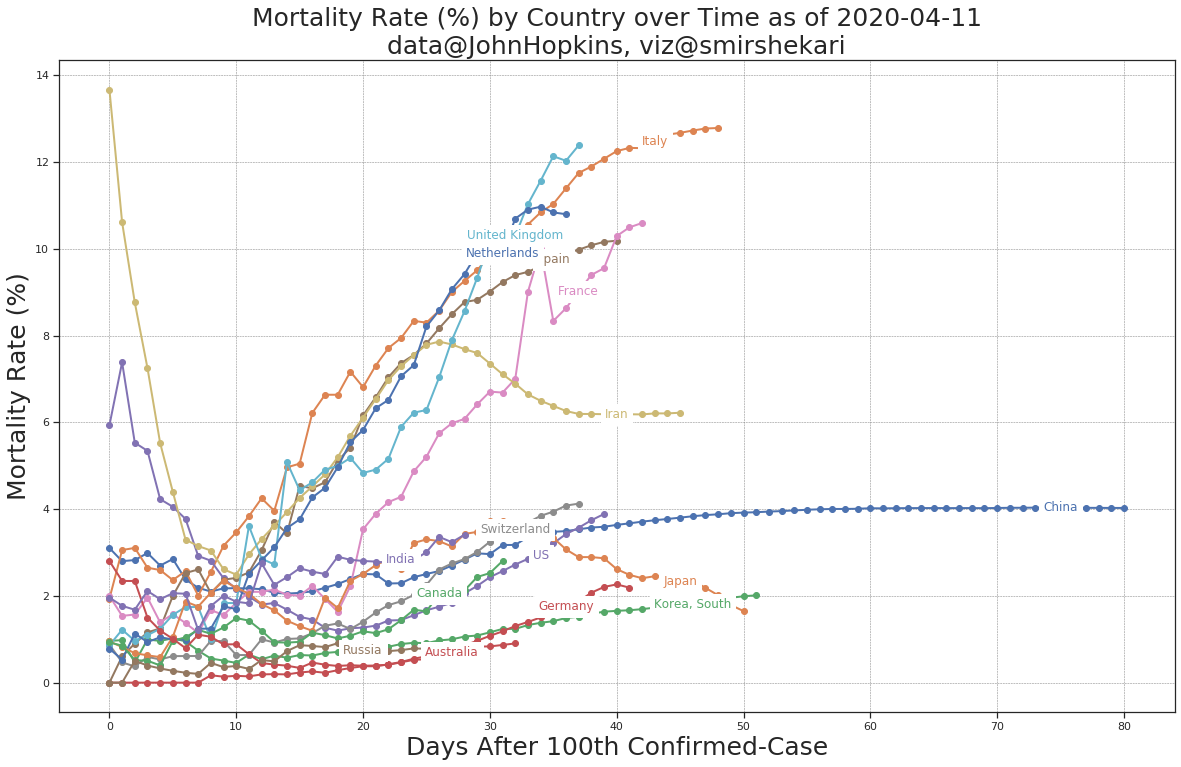

In [51]:
X_AXIS = 'days_after_threshold'
Y_AXIS = 'dead_by_confirmed'

df = data_frames_indexed
df = df.dropna()

plt.figure(figsize=(20, 12))
plt.xticks(rotation=0)

plt.title(labels_dic[Y_AXIS]+ ' by Country over Time as of '+ last_date+ '\n'+ title_note, size= 25)
plt.ylabel(labels_dic[Y_AXIS], size= 25)
plt.xlabel(labels_dic[X_AXIS], size= 25)

plt.grid(color='gray', linestyle='--', linewidth=.5)
#################

xvals = []
for country in country_list:
    X = df.loc[df['Country/Region']==country, X_AXIS].astype('float')
    Y = df.loc[df['Country/Region']==country, Y_AXIS].astype('float')
    plt.plot(X, Y, 'o-', label=country, linewidth=2)
    label_loc = max(X)-5
    xvals.append(label_loc)
    
lines = plt.gca().get_lines()
labelLines(lines, align=False, xvals=xvals)


plt.show()

## Current Under-Medicare Population by Country

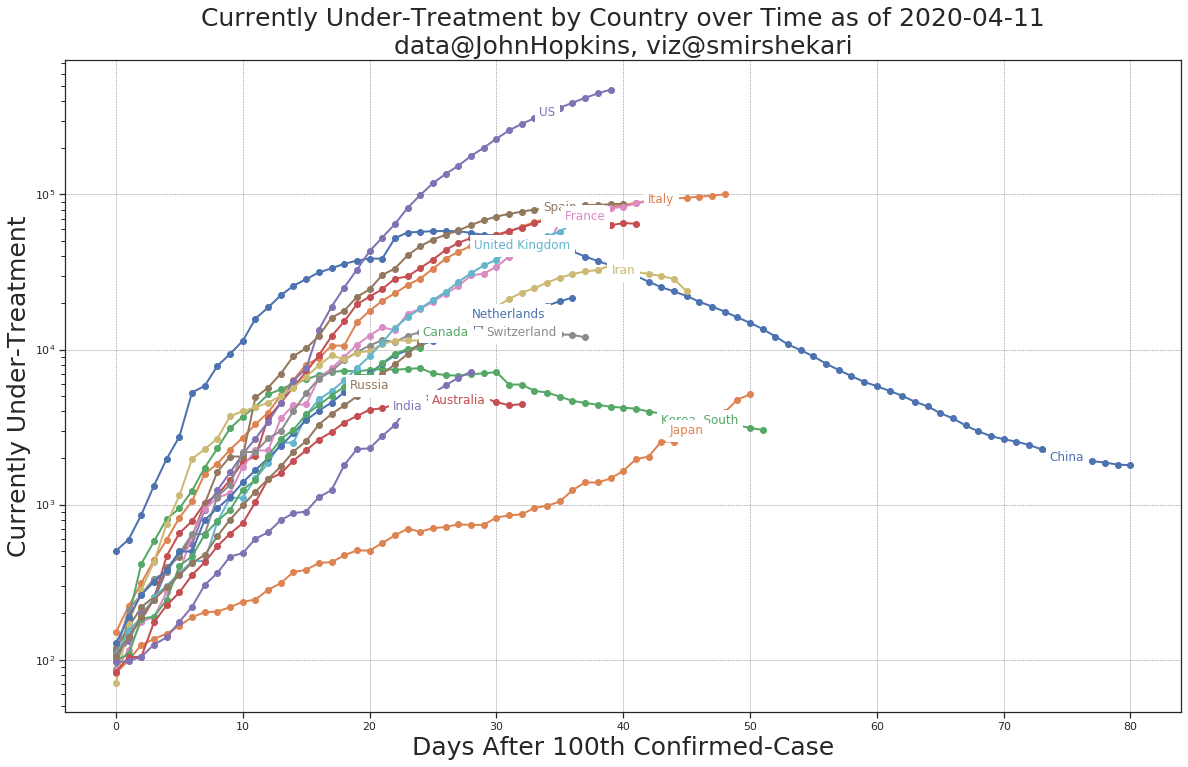

In [44]:
X_AXIS = 'days_after_threshold'
Y_AXIS = 'confirmed_minus_recovered&dead'

df = data_frames_indexed
df = df.dropna()

plt.figure(figsize=(20, 12))
plt.xticks(rotation=0)
plt.title(labels_dic[Y_AXIS]+ ' by Country over Time as of '+ last_date+ '\n'+ title_note, size= 25)
plt.ylabel(labels_dic[Y_AXIS], size= 25)
plt.xlabel(labels_dic[X_AXIS], size= 25)

plt.yscale('log')
plt.grid(color='gray', linestyle='--', linewidth=.5)
#################

xvals = []
for country in country_list:
    X = df.loc[df['Country/Region']==country, X_AXIS].astype('float')
    Y = df.loc[df['Country/Region']==country, Y_AXIS].astype('float')
    plt.plot(X, Y, 'o-', label=country, linewidth=2)
    label_loc = max(X)-5
    xvals.append(label_loc)
    
lines = plt.gca().get_lines()
labelLines(lines, align=False, xvals=xvals)


plt.show()

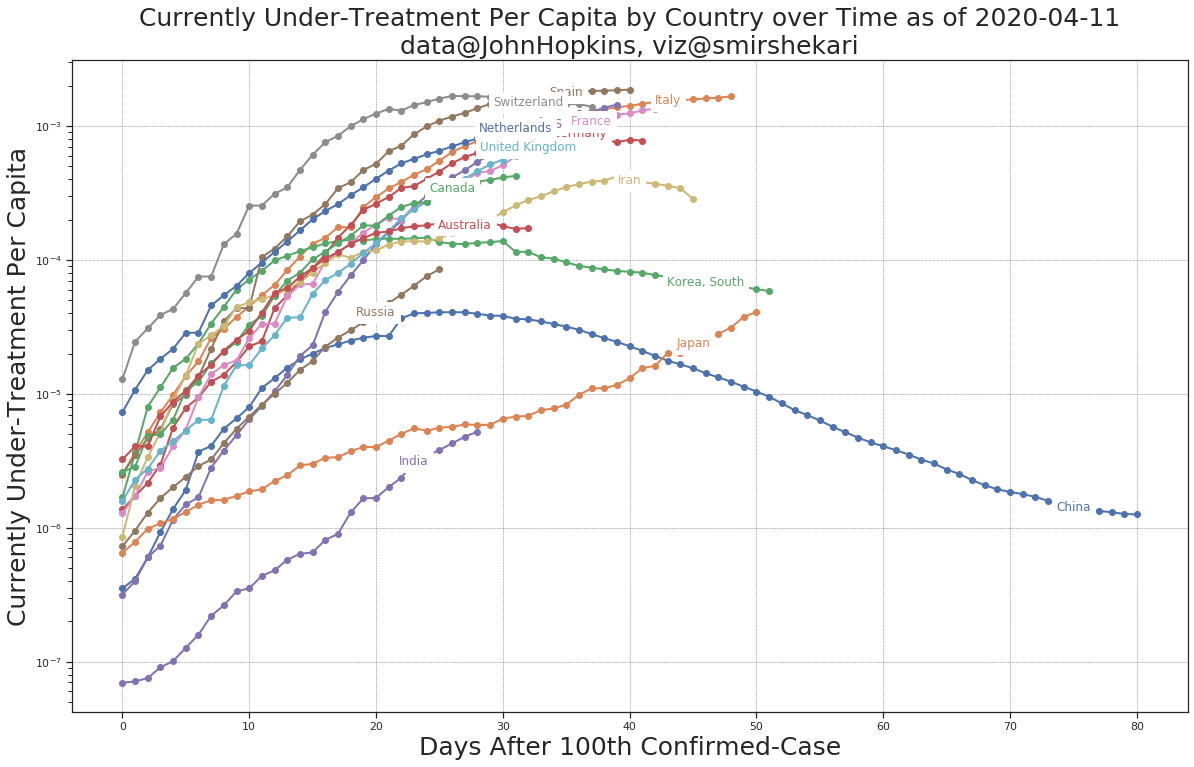

In [38]:
X_AXIS = 'days_after_threshold'
Y_AXIS = 'confirmed_minus_recovered&dead_per_capita'

df = data_frames_indexed
df = df.dropna()

plt.figure(figsize=(20, 12))
plt.xticks(rotation=0)
plt.title(labels_dic[Y_AXIS]+ ' by Country over Time as of '+ last_date+ '\n'+ title_note, size= 25)
plt.ylabel(labels_dic[Y_AXIS], size= 25)
plt.xlabel(labels_dic[X_AXIS], size= 25)

plt.yscale('log')
plt.grid(color='gray', linestyle='--', linewidth=.5)
#################

xvals = []
for country in country_list:
    X = df.loc[df['Country/Region']==country, X_AXIS].astype('float')
    Y = df.loc[df['Country/Region']==country, Y_AXIS].astype('float')
    plt.plot(X, Y, 'o-', label=country, linewidth=2)
    label_loc = max(X)-5
    xvals.append(label_loc)
    
lines = plt.gca().get_lines()
labelLines(lines, align=False, xvals=xvals)


plt.show()

## Confirmed Cases

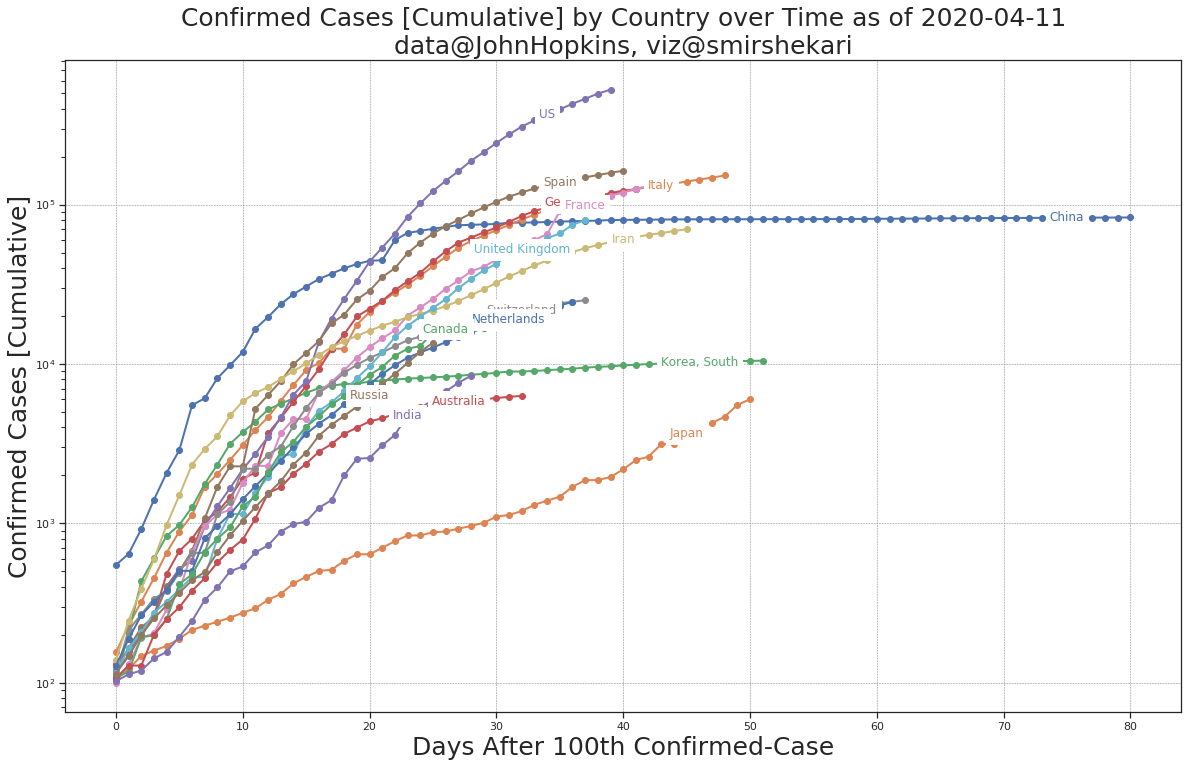

In [34]:
X_AXIS = 'days_after_threshold'
Y_AXIS = '#confirmed'

df = data_frames_indexed
df = df.dropna()

plt.figure(figsize=(20, 12))
plt.xticks(rotation=0)
plt.title(labels_dic[Y_AXIS]+ ' by Country over Time as of '+ last_date+ '\n'+ title_note, size= 25)
plt.ylabel(labels_dic[Y_AXIS], size= 25)
plt.xlabel(labels_dic[X_AXIS], size= 25)

plt.yscale('log')
plt.grid(color='gray', linestyle='--', linewidth=.5)
#################

xvals = []
for country in country_list:
    X = df.loc[df['Country/Region']==country, X_AXIS].astype('float')
    Y = df.loc[df['Country/Region']==country, Y_AXIS].astype('float')
    plt.plot(X, Y, 'o-', label=country, linewidth=2)
    label_loc = max(X)-5
    xvals.append(label_loc)
    
lines = plt.gca().get_lines()
labelLines(lines, align=False, xvals=xvals)


plt.show()

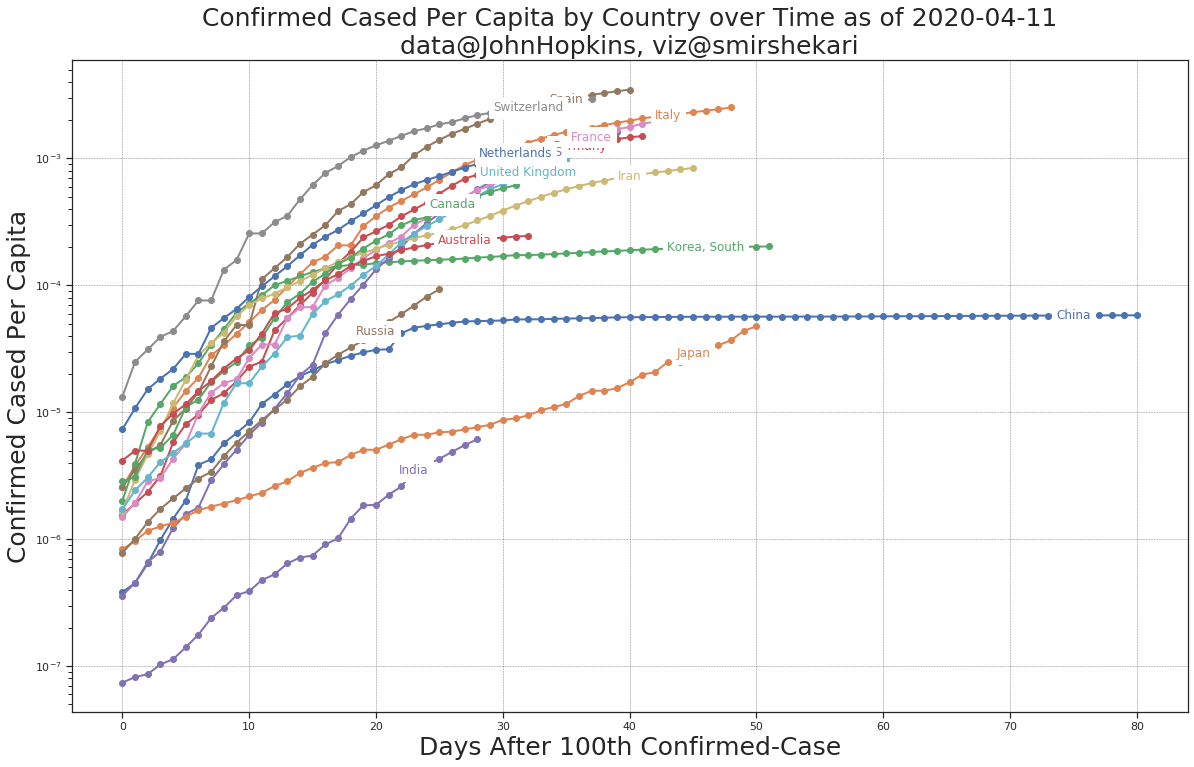

In [39]:
X_AXIS = 'days_after_threshold'
Y_AXIS = 'confirmed_per_capita'

df = data_frames_indexed
df = df.dropna()

plt.figure(figsize=(20, 12))
plt.xticks(rotation=0)
plt.title(labels_dic[Y_AXIS]+ ' by Country over Time as of '+ last_date+ '\n'+ title_note, size= 25)
plt.ylabel(labels_dic[Y_AXIS], size= 25)
plt.xlabel(labels_dic[X_AXIS], size= 25)

plt.yscale('log')
plt.grid(color='gray', linestyle='--', linewidth=.5)
#################

xvals = []
for country in country_list:
    X = df.loc[df['Country/Region']==country, X_AXIS].astype('float')
    Y = df.loc[df['Country/Region']==country, Y_AXIS].astype('float')
    plt.plot(X, Y, 'o-', label=country, linewidth=2)
    label_loc = max(X)-5
    xvals.append(label_loc)
    
lines = plt.gca().get_lines()
labelLines(lines, align=False, xvals=xvals)


plt.show()

## Death Cases

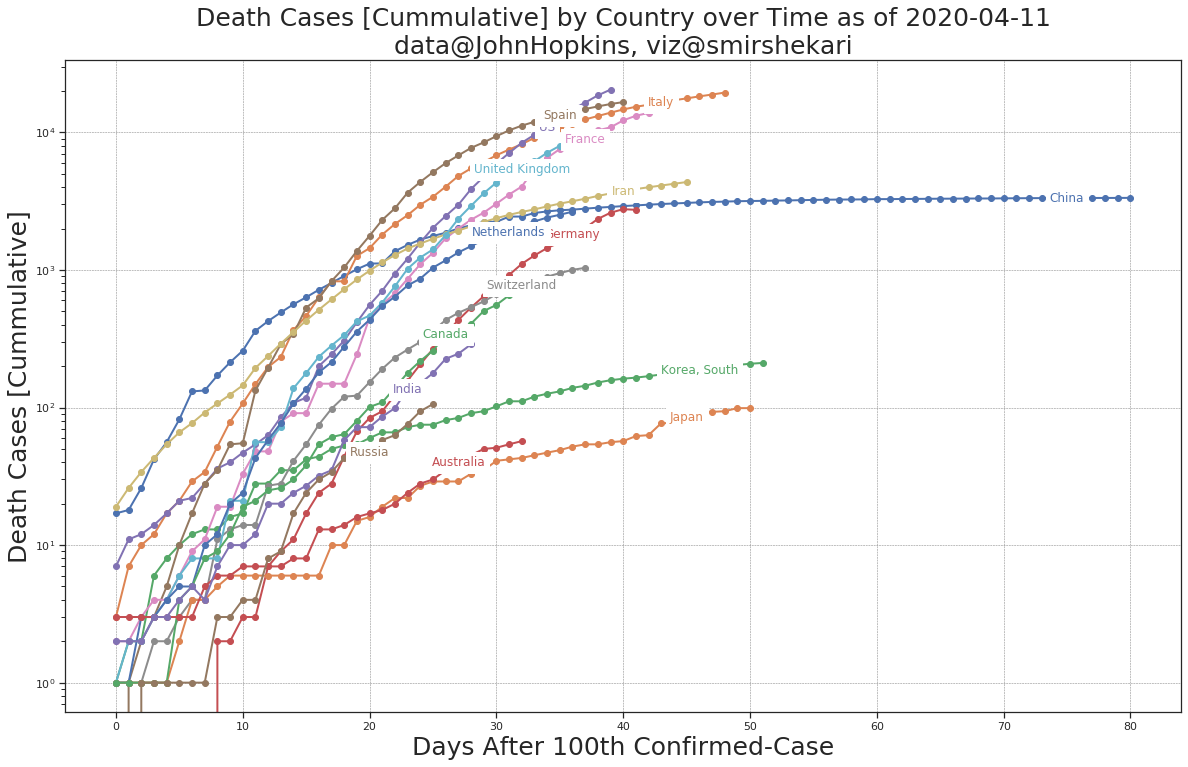

In [40]:
X_AXIS = 'days_after_threshold'
Y_AXIS = '#dead'

df = data_frames_indexed
df = df.dropna()

plt.figure(figsize=(20, 12))
plt.xticks(rotation=0)
plt.title(labels_dic[Y_AXIS]+ ' by Country over Time as of '+ last_date+ '\n'+ title_note, size= 25)
plt.ylabel(labels_dic[Y_AXIS], size= 25)
plt.xlabel(labels_dic[X_AXIS], size= 25)

plt.yscale('log')
plt.grid(color='gray', linestyle='--', linewidth=.5)
#################

xvals = []
for country in country_list:
    X = df.loc[df['Country/Region']==country, X_AXIS].astype('float')
    Y = df.loc[df['Country/Region']==country, Y_AXIS].astype('float')
    plt.plot(X, Y, 'o-', label=country, linewidth=2)
    label_loc = max(X)-5
    xvals.append(label_loc)
    
lines = plt.gca().get_lines()
labelLines(lines, align=False, xvals=xvals)


plt.show()

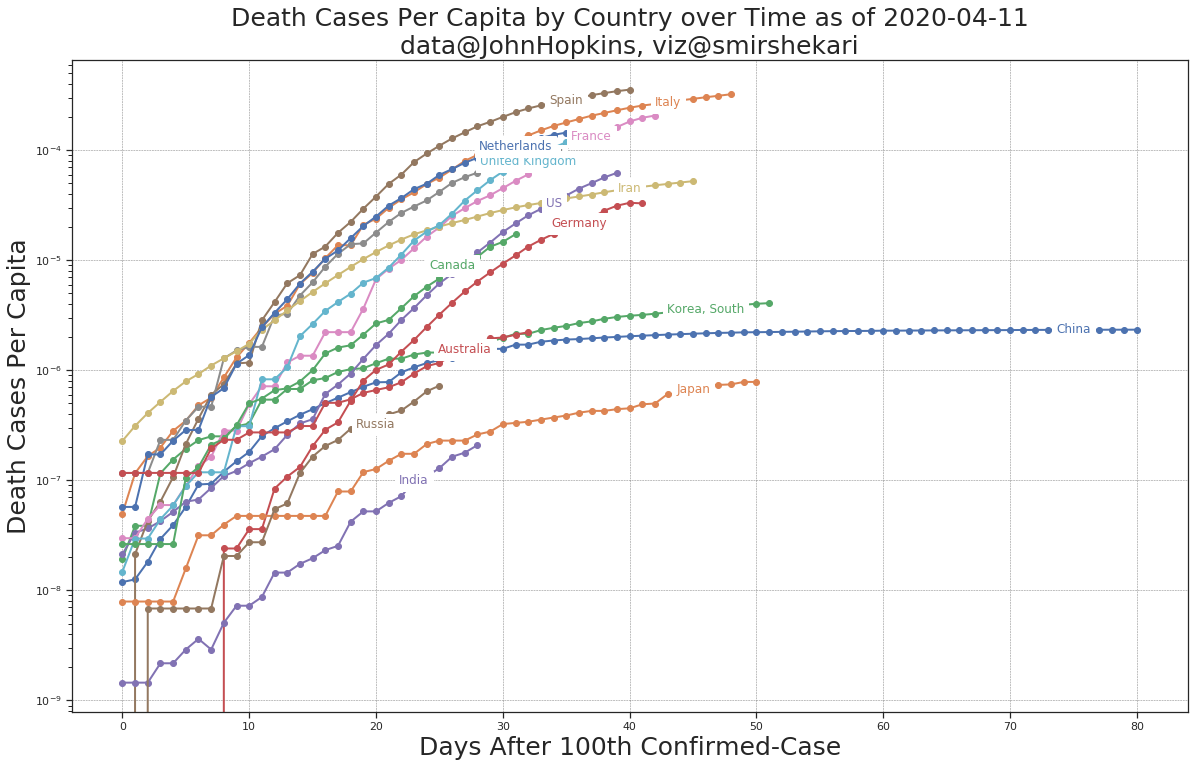

In [41]:
X_AXIS = 'days_after_threshold'
Y_AXIS = 'dead_per_capita'

df = data_frames_indexed
df = df.dropna()

plt.figure(figsize=(20, 12))
plt.xticks(rotation=0)
plt.title(labels_dic[Y_AXIS]+ ' by Country over Time as of '+ last_date+ '\n'+ title_note, size= 25)
plt.ylabel(labels_dic[Y_AXIS], size= 25)
plt.xlabel(labels_dic[X_AXIS], size= 25)

plt.yscale('log')
plt.grid(color='gray', linestyle='--', linewidth=.5)
#################

xvals = []
for country in country_list:
    X = df.loc[df['Country/Region']==country, X_AXIS].astype('float')
    Y = df.loc[df['Country/Region']==country, Y_AXIS].astype('float')
    plt.plot(X, Y, 'o-', label=country, linewidth=2)
    label_loc = max(X)-5
    xvals.append(label_loc)
    
lines = plt.gca().get_lines()
labelLines(lines, align=False, xvals=xvals)


plt.show()